>"Прогноз `линейной регрессией` - это тупо прямая линия.
>При помощи 'линейки' хорошего прогноза не получить" (с) мнение новичка после пары недель изучения ML


<img src = '../../assets/ahaha.jpg' width = '500px'>
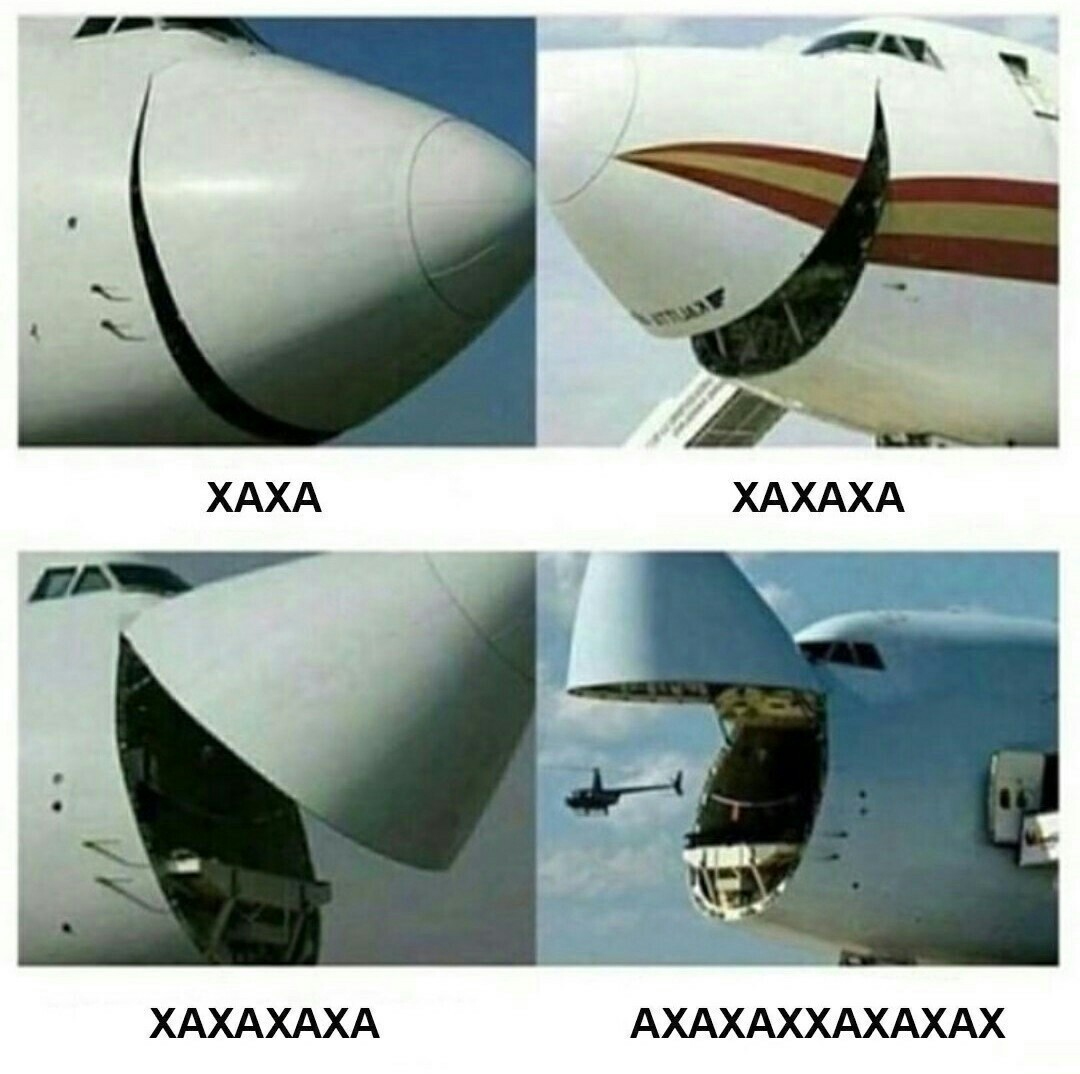

In [1]:
import sys
print(sys.version)

3.8.1 (tags/v3.8.1:1b293b6, Dec 18 2019, 23:11:46) [MSC v.1916 64 bit (AMD64)]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# эстетики ради
import seaborn as sns
sns.set() 

In [3]:
years_series = [1,2,3,4,5,6,7]
salary = [60000, 65000, 75000, 90000, 110000, 140000, 180000]
salaries = pd.Series(data= salary, index = years_series)

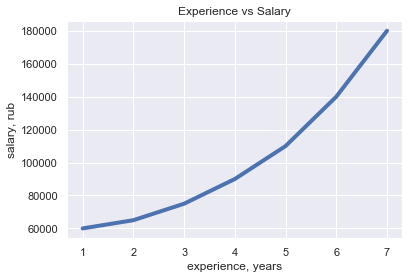

In [4]:
salaries.plot(linewidth = 4, title = 'Experience vs Salary')
plt.xlabel('experience, years')
plt.ylabel('salary, rub')
plt.show()

# Какая зарплата ожидается на восьмой год работы?
---

In [5]:
X_train = np.array(years_series).reshape(-1, 1)
y_train = np.array(salary).reshape(-1, 1)

X_predict = np.array([8]).reshape(-1, 1) # предсказание для 8-го года

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_predict)

# делаем пандасовый ряд, чтобы отрисовать
prediction = pd.Series(data = y_predict.flatten(), index = X_predict.flatten())


коэффициент детерминации (R^2) 0.92


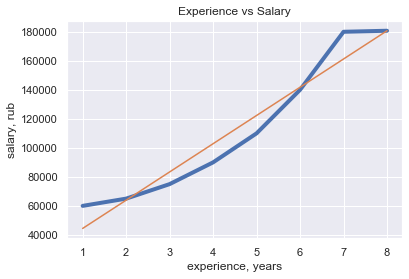

In [7]:
# ВИЗУАЛИЗАЦИЯ

# обычно модель получают проще - подают изначальные X в .predict после .fit.
# но нижеприведенный способ для разъяснения как строится модель
lr_model = [{
    'years':x, 
    'salary': lr.coef_.flatten()[0]*x + lr.intercept_[0]
  } for x in years_series + X_predict.flatten().tolist()
]
lr_model = pd.DataFrame(lr_model).set_index('years').squeeze()

print('коэффициент детерминации (R^2)', round(lr.score(X_train,y_train),2))
salaries.append(prediction).plot(linewidth = 4, title = 'Experience vs Salary')
lr_model.plot()
plt.xlabel('experience, years')
plt.ylabel('salary, rub')
plt.show()

## Вот бы как-то учесть параболу в графике..


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(
    degree=3, include_bias=False)
lr = LinearRegression()
pipeline = Pipeline([
  ("polynomial_features", polynomial_features),
  ("linear_regression", lr)
])

pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_predict)
print(y_predict)

[[231428.57142857]]


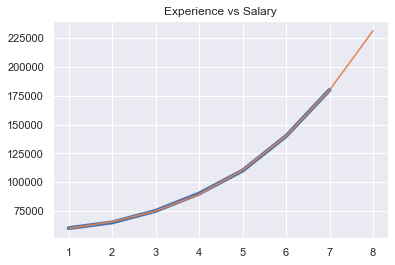

In [9]:
# ВИЗУАЛИЗАЦИЯ
X_full = np.concatenate([X_train,X_predict.astype(int)])
pipeline_model = pipeline.predict(X_full)
pipeline_model.flatten().tolist()

salaries.plot(linewidth = 4, title = 'Experience vs Salary')
pd.Series(data = pipeline_model.flatten().tolist(), index = X_full.flatten().tolist()).plot()